<a href="https://colab.research.google.com/github/CintiaFortunato98/Trabalho-de-controle-FTMA/blob/main/Trabalho01_controle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sorteio dos valores de K, P1 e P2

In [ ]:
import numpy as np

#Sorteio
K1 = np.random.uniform(5, 15)
P1 = np.random.uniform(0.5, 1.5)
P2 = np.random.uniform(2, 4)

K1 = round(K1, 2)
P1 = round(P1, 2)
P2 = round(P2, 2)

print(f"K1: {K1}")
print(f"P1: {P1}")
print(f"P2: {P2}")

K1: 9.83
P1: 1.06
P2: 2.27


In [170]:
!pip install control

2.4478128179043743
Função de Tranferência:
        24.062         
───────────────────────
 3         2           
s  + 3.33⋅s  + 2.4062⋅s


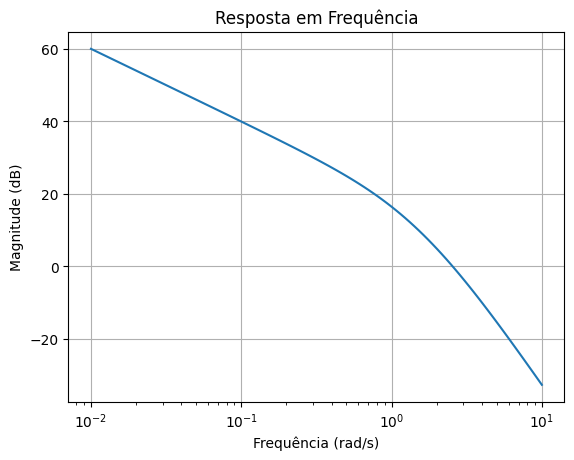

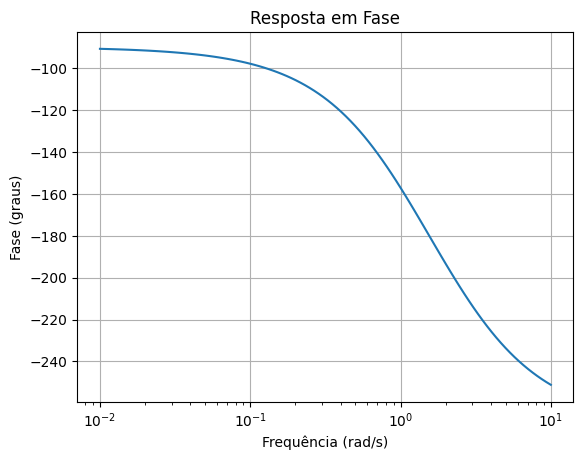

In [197]:
# Obtenha o valor do ganho do compensador de forma a atender a especificação de erro no estado permanente.

import scipy.signal as signal
import matplotlib.pyplot as plt
import sympy as sp

K1 = 9.83
P1 = 1.06
P2 = 2.27
erro = 0.1

kv = K1 / (P1*P2)
K = 1 / (kv * erro)
print (K)

num = [K1*K]
den = [1, (P1 + P2), (P1 * P2), 0]

#Função de transferência
sysG1 = signal.TransferFunction(num, den)

# Plotando a resposta em frequência (Bode)
w, mag, phase = signal.bode(sysG1)

s = sp.symbols('s')
nums = K1 * K
dens = s**3 + (P1 + P2) * s**2 + (P1 * P2) * s

Gc = nums / dens

print('Função de Tranferência:')
sp.pprint(Gc)

# Gráfico de Magnitude
plt.figure()
plt.semilogx(w, mag)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title('Resposta em Frequência')
plt.grid(True)

# Gráfico de Fase
plt.figure()
plt.semilogx(w, phase)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.title('Resposta em Fase')
plt.grid(True)

# Exibir gráficos
plt.show()



O sistema é instável.


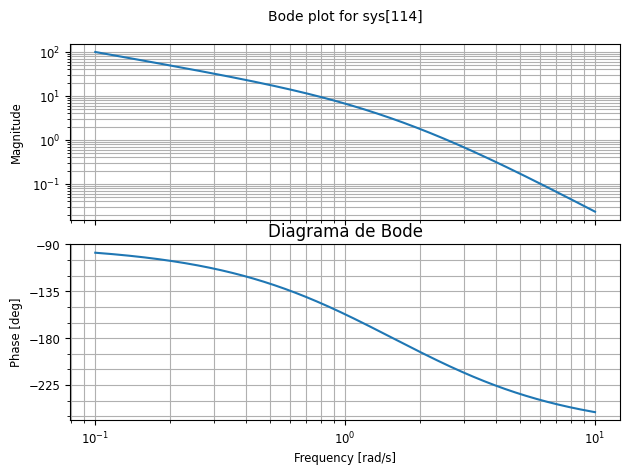

In [172]:
#Questão 3) Diagrama de Bode

import control
import numpy as np


G1 = control.tf(num,den)
control.bode_plot(G1)
plt.title('Diagrama de Bode')



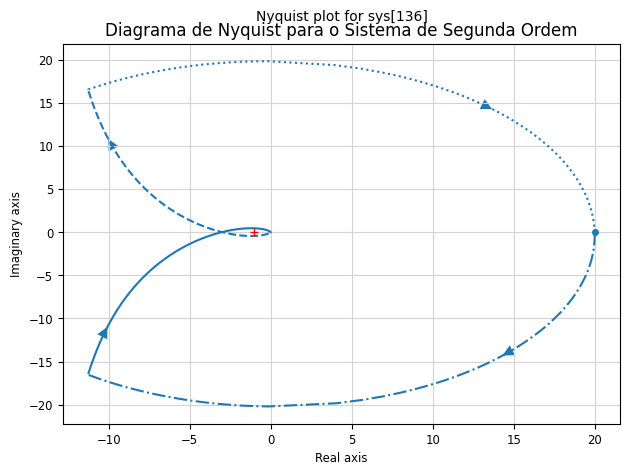

O sistema é estável.


In [198]:
#Questão 3) Diagrama de Nyquist

num = [K1*K]
den = [1, (P1 + P2), (P1 * P2), 0]
sys = control.tf(num, den)

plt.figure()
control.nyquist_plot(sys)
plt.title('Diagrama de Nyquist para o Sistema de Segunda Ordem')
plt.grid(True)
plt.show()




In [199]:
# Questão 4

import numpy as np
G1 = control.tf(num,den)
gm, pm, wcg, wcp = control.margin(G1)

print('Margem de ganho = ', gm)
print('Margem de fase = ', pm)
print('Frequência de ganho = ', wcg)
print('Frequência de polo = ', wcp)

# Verificação se o sistema é estável ou não
if gm > 0 and pm > 20:
  print("O sistema é estável.")
else:
  print("O sistema é instável.")

Margem de ganho =  0.3329999999999999
Margem de fase =  -25.770207926819552
Frequência de ganho =  1.5511930892058536
Frequência de polo =  2.550917679074938
O sistema é instável.


In [175]:
import math
angle_degrees = 20 - pm + 7 #angle_degress = 20 - gm + 10
valor_arredondado = math.ceil(angle_degrees)
print (valor_arredondado)

angle_radians = np.radians(valor_arredondado)
print(angle_radians)

sin_value = np.sin(angle_radians)
print(sin_value)

alpha=(1-sin_value)/(1+sin_value)
print(alpha)

1/np.sqrt(alpha)

decibels = 20 * np.log10(2.14)
print(decibels)

index = np.argmin(np.abs(mag + decibels))
frequency = w[index]
print(frequency)

T=1/(np.sqrt(alpha)*frequency)
print(T)

Kc=K/alpha
print(Kc)

wz = 1/T
print(wz) #frequência de zero

wp = 1/(alpha*T)
print(wp) #frequência de polo


53
0.9250245035569946
0.7986355100472928
0.11195402783269444
6.608275466983818
3.511191734215131
0.8511881973346479
21.86444619538314
1.17482832014275
10.493845937355902


In [176]:
T=1/(np.sqrt(alpha)*frequency) #período frequencia

Kc=K/alpha

print(f"frequência de zero: {1/T :.2f} ")
print(f"frequência de polo: { 1/(alpha*T):.2f} ")
print(f"Kc: {Kc:.2f}")

frequência de zero: 1.17 
frequência de polo: 10.49 
Kc: 21.86


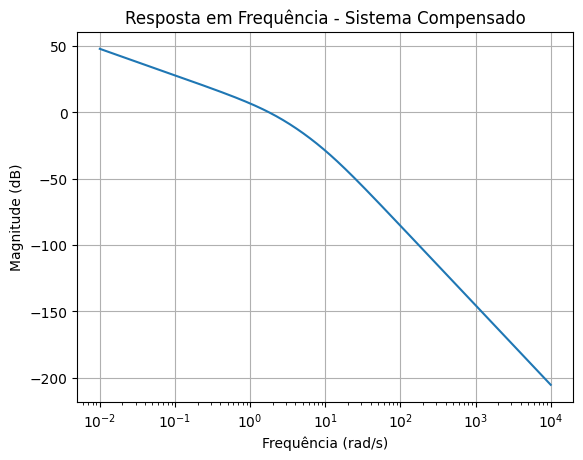

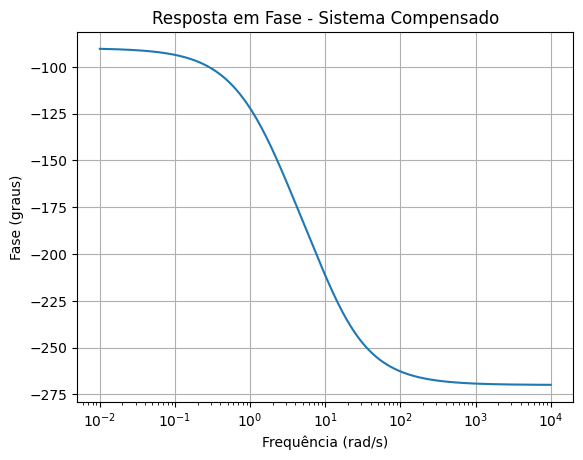

In [177]:
import numpy as np
from scipy import signal
from sympy import symbols, Poly, fraction, simplify

# Definição da função de transferência
num = np.convolve([Kc*K], [1, wz])
den = np.convolve(np.convolve(np.convolve([1, wp],[1, 0]),[1, P1]),[1, P2])

GcG = signal.TransferFunction(num, den)
w = np.logspace(np.log10(0.01), np.log10(10000), 100*4)
w, mag, phase = signal.bode(GcG,w)

plt.figure()
plt.semilogx(w, mag)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title('Resposta em Frequência - Sistema Compensado')
plt.grid(True)

plt.figure()
plt.semilogx(w, phase)
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.title('Resposta em Fase - Sistema Compensado')
plt.grid(True)


In [183]:
GcG = control.tf(num,den)
gm, pm, wcg, wcp = control.margin(GcG)

print('gm = ', 20 * np.log10 (gm))
print('pm = ', pm)
print('wcg = ', wcg)
print('wcp = ', wcp)

# Verificação se o sistema é estável ou não
polos = control.poles(GcG)
if gm > 0 and pm > 20:
  print("O sistema é estável.")
else:
  print("O sistema é instável.")


gm =  14.522071194541002
pm =  39.41841315581681
wcg =  4.736292250180244
wcp =  1.789956719074767
O sistema é estável.


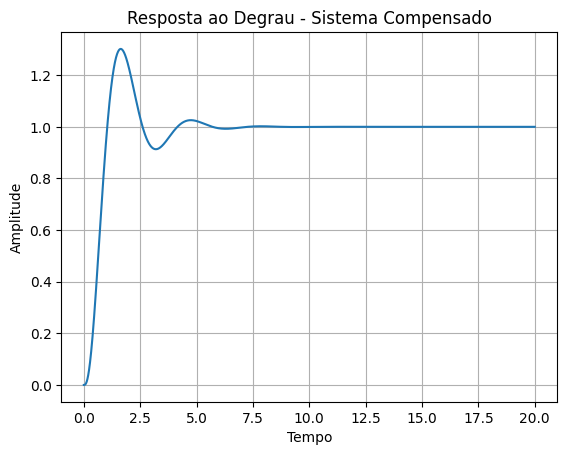

In [188]:
t = np.linspace(0, 20, 10000)  # Intervalo de tempo de 0 a 10 segundos com 500 pontos

sys_comp = control.feedback(GcG, 1)
t, y = control.step_response(sys_comp,t)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau - Sistema Compensado')
plt.grid(True)
plt.show()

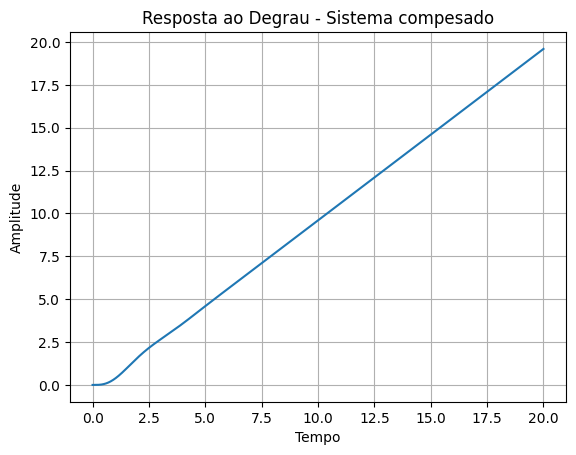

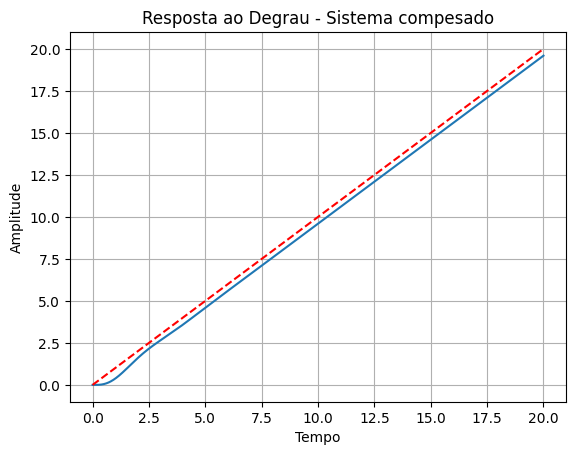

In [187]:
# erro

t, y = control.forced_response(sys_comp,t,t)
# Plot the step response

plt.figure()
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau - Sistema compesado')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, y)
plt.plot(t,t,'--',color='red')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau - Sistema compesado')
plt.grid(True)
plt.show()